<a href="https://colab.research.google.com/github/ashmit009/Computer-Vision/blob/main/opencvlast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

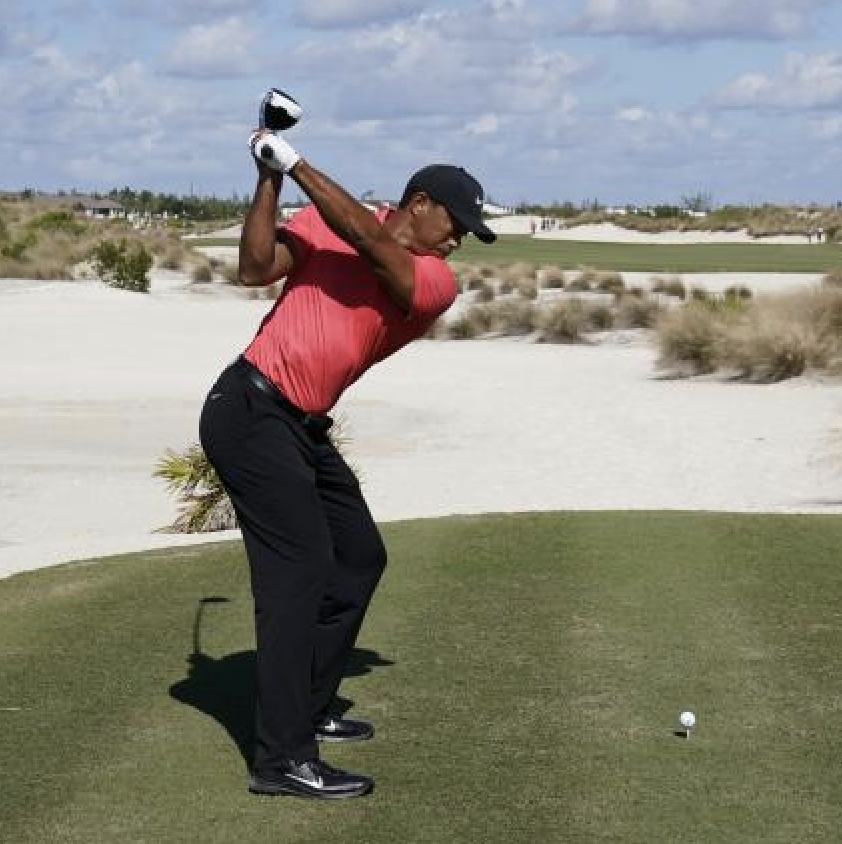

In [ ]:
import cv2
import sys
import os
protoFile = "/content/drive/MyDrive/Pose estim/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile ="/content/drive/MyDrive/Pose estim/pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [
[0, 1],
[1, 2],
[2, 3],
[3, 4],
[1, 5],
[5, 6],
[6, 7],
[1, 14],
[14, 8],
[8, 9],
[9, 10],
[14, 11],
[11, 12],
[12, 13],
]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
from PIL import Image
im = cv2.imread("/content/drive/MyDrive/Pose estim/Tiger_Woods_crop.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
inWidth = im.shape[1]
inHeight = im.shape[0]
im = cv2.imread("/content/drive/MyDrive/Pose estim/Tiger_Woods_crop.png")

Image.open("/content/drive/MyDrive/Pose estim/Tiger_Woods_crop.png")

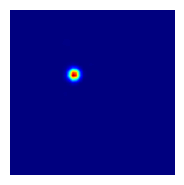

In [ ]:
netInputSize = (368, 368)
inpBlob = cv2.dnn.blobFromImage(im, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(inpBlob)
import matplotlib.pyplot as plt
# Forward Pass
output = net.forward()
# Display probability maps
plt.figure(figsize=(20, 5))
for i in range(nPoints):
  probMap = output[0, i, :, :]
displayMap = cv2.resize(probMap, (inWidth, inHeight), cv2.INTER_LINEAR)
plt.subplot(2, 8, i + 1)
plt.axis("off")
plt.imshow(displayMap, cmap="jet")

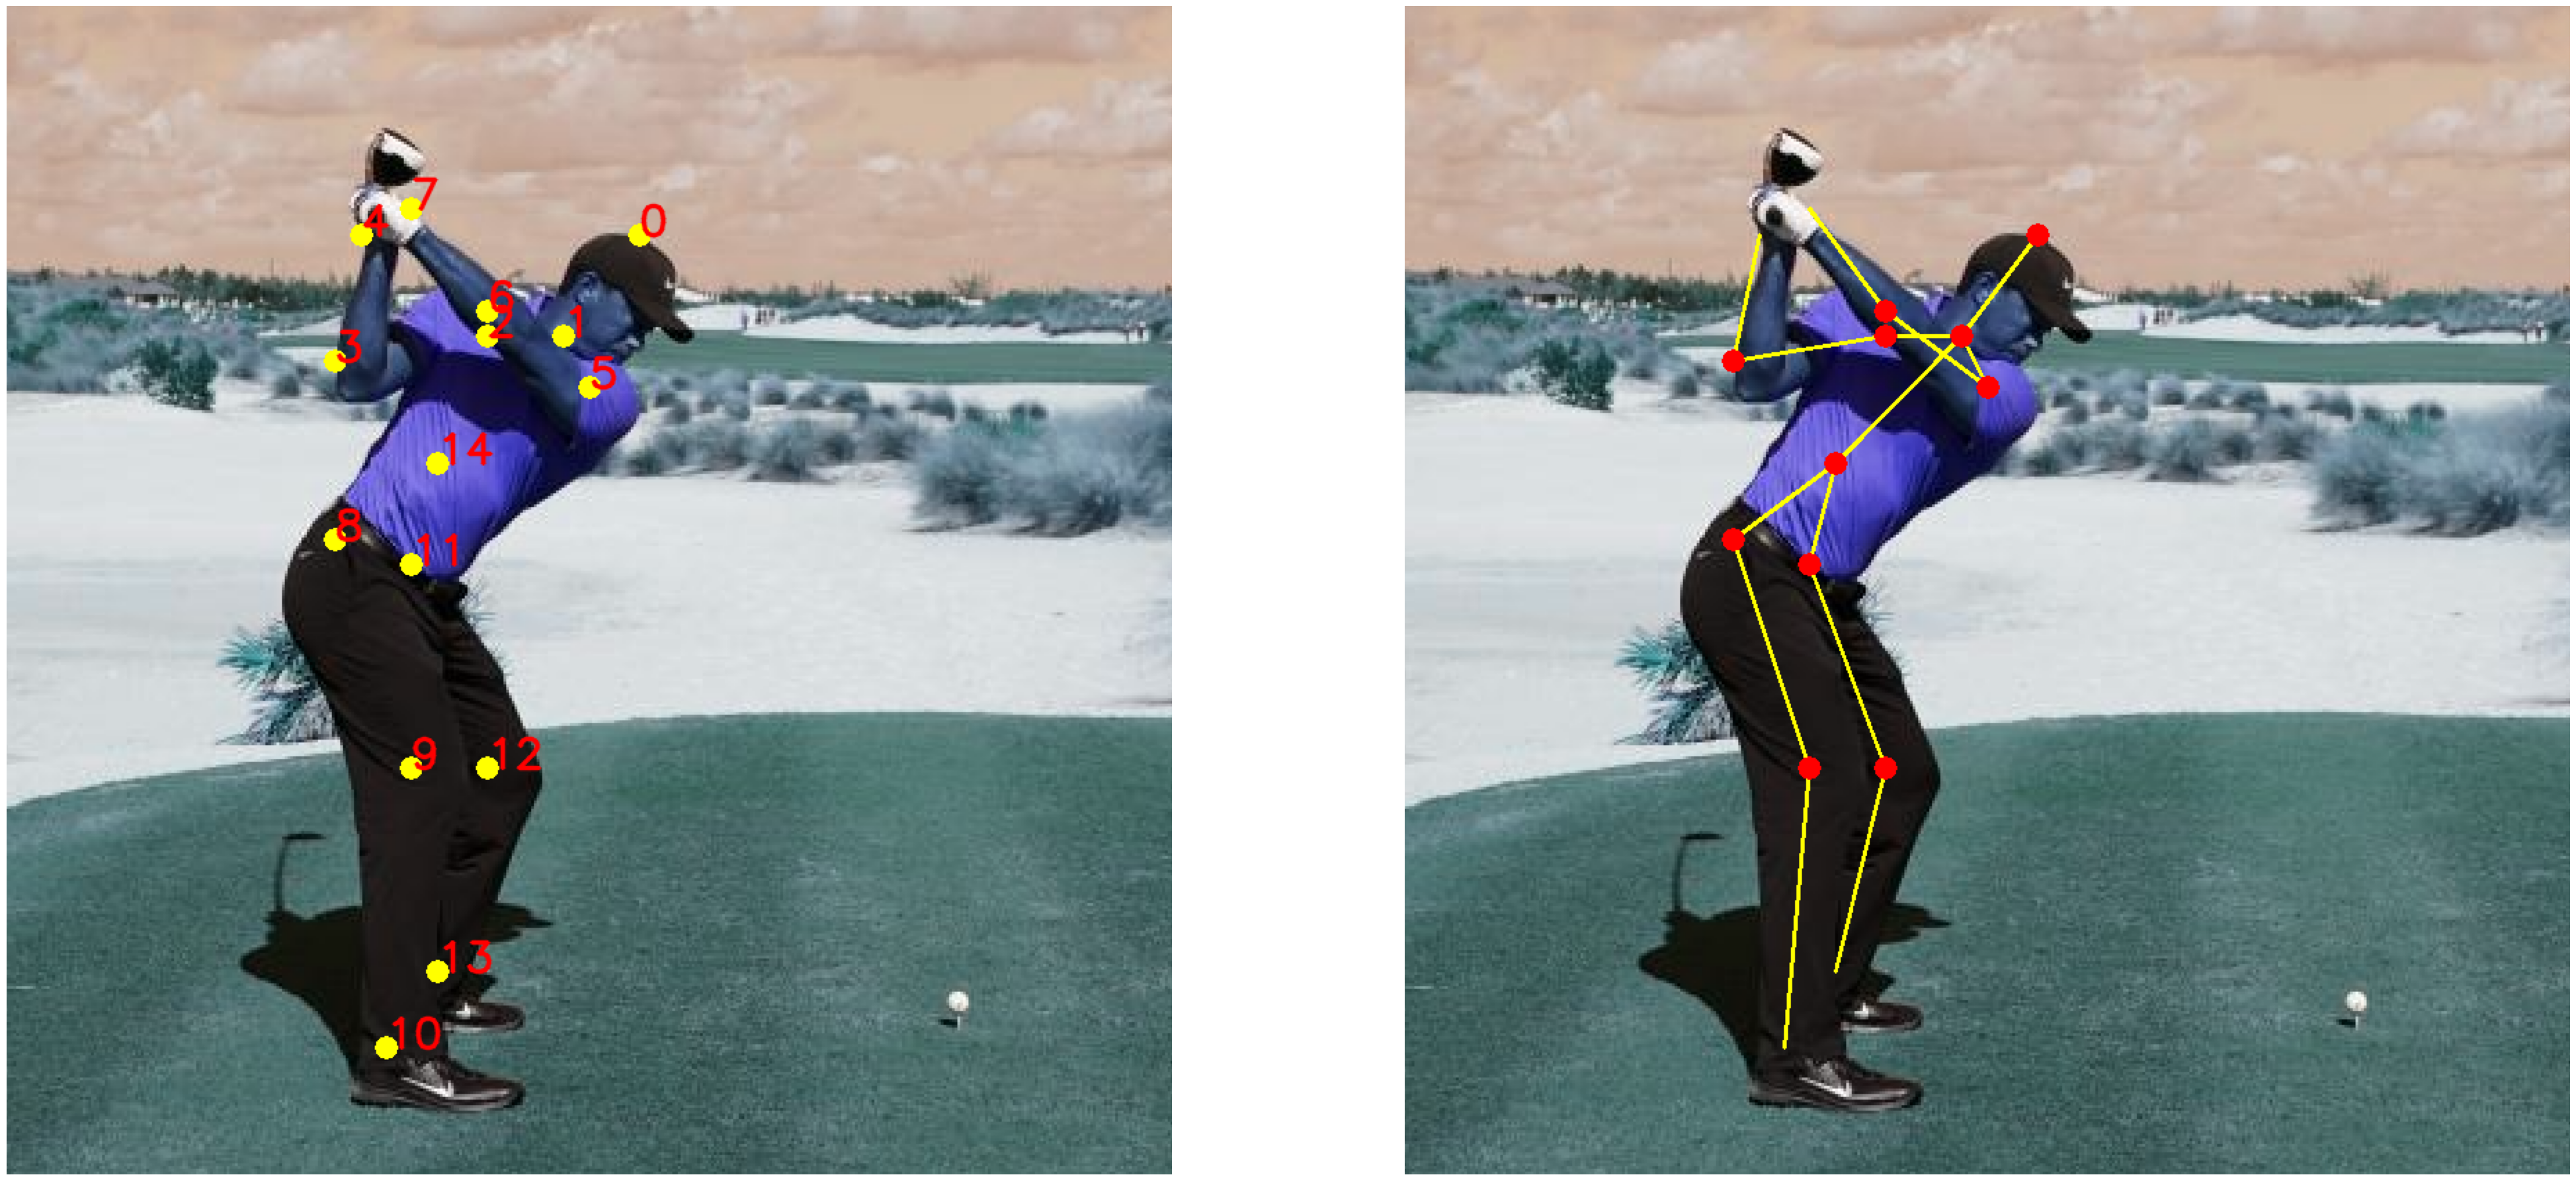

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming POSE_PAIRS is defined somewhere in your code
# POSE_PAIRS = ...

# Assuming output, inWidth, inHeight, and nPoints are defined somewhere in your code
# output = ...
# inWidth = ...
# inHeight = ...
# nPoints = ...

# X and Y Scale
scaleX = inWidth / output.shape[3]
scaleY = inHeight / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Threshold
threshold = 0.1

for i in range(nPoints):
    # Obtain probability map
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]

    if prob > threshold:
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else:
        points.append(None)

imPoints = im.copy()
imSkeleton = im.copy()

# Draw points
for i, p in enumerate(points):
    if p is not None:
        cv2.circle(imPoints, p, 8, (255, 255, 0), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, lineType=cv2.LINE_AA)

# Draw skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

plt.figure(figsize=(50, 50))
plt.subplot(121)
plt.axis("off")
plt.imshow(imPoints)
plt.subplot(122)
plt.axis("off")
plt.imshow(imSkeleton)
plt.show()
